In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [24]:
data = pd.read_csv(r'D:\Downloads\Mattijn@Zhou\anomaly_class/revenue-example.csv', sep=",")
week     = data['week'][:, np.newaxis]
revenue  = data['revenue']

In [25]:
data

,week,customer_count,support_requests,revenue,support_cost
0,1,10,2,100,12
1,2,15,5,150,15
2,3,25,7,240,20
3,4,33,12,350,20
4,5,51,13,552,20
5,6,134,20,880,36
6,7,150,22,900,38
7,8,200,29,1020,44
8,9,212,31,1100,46
9,10,199,23,1089,45


In [30]:
lr = LinearRegression()
train_week = week[0:5]
train_revenue = revenue[0:5]
lr.fit(train_week, train_revenue)

b_0   = lr.intercept_
coeff = lr.coef_

In [31]:
# Let's just test some points.
pred_week = week[5::]
pred_rev  = revenue[5::]

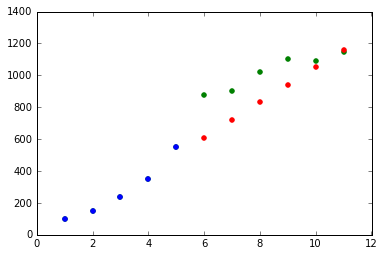

In [37]:
# Let's predict the values for existing weeks (Testing)
pred = lr.predict(pred_week)

plt.scatter(week, revenue, color='g')
plt.scatter(train_week, train_revenue, color='b')
plt.scatter(pred_week, pred, color='red')
plt.show()

In [38]:
# Not query pretty, but we align our week matrices.
predict_week = np.array(
  [a for a in xrange(max(train_week)+1, max(train_week)+3)]
)[:, np.newaxis]

In [39]:
predict_week

array([[6],
       [7]])

In [40]:
forecast_2w = lr.predict(predict_week)
forecast_2w

array([ 609.6,  720. ])

In [21]:
print forecast_2w

forecast_2w[0] == b_0 + (coeff * 12) // np.array([ True], dtype=bool)
forecast_2w[1] == b_0 + (coeff * 13) // np.array([ True], dtype=bool)

[ 1406.85454545  1527.3       ]


array([False], dtype=bool)

In [23]:
# sklearn has an r2_score method. 
score = r2_score(revenue, lr.predict(week[:]))
print score

# Or you can `score` the one from LinearRegression
score = lr.score(week[:], revenue[:])
print score

0.938751718419
0.938751718419
